## オープニング処理

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Gray scale
def BGR2GRAY(img):
	b = img[:, :, 0].copy()
	g = img[:, :, 1].copy()
	r = img[:, :, 2].copy()

	# Gray scale
	out = 0.2126 * r + 0.7152 * g + 0.0722 * b
	out = out.astype(np.uint8)

	return out

# Otsu Binalization
def otsu_binarization(img, th=128):
	H, W = img.shape
	out = img.copy()

	max_sigma = 0
	max_t = 0

	# determine threshold
	for _t in range(1, 255):
		v0 = out[np.where(out < _t)]
		m0 = np.mean(v0) if len(v0) > 0 else 0.
		w0 = len(v0) / (H * W)
		v1 = out[np.where(out >= _t)]
		m1 = np.mean(v1) if len(v1) > 0 else 0.
		w1 = len(v1) / (H * W)
		sigma = w0 * w1 * ((m0 - m1) ** 2)
		if sigma > max_sigma:
			max_sigma = sigma
			max_t = _t

	# Binarization
	print("threshold >>", max_t)
	th = max_t
	out[out < th] = 0
	out[out >= th] = 255

	return out

def Morphology_Dilate(img, Dilate_time=1):
    H, W = img.shape
    out = img.copy()   
    
    # preparing filter
    K = [[0.,1.,0.],[1.,0.,1.],[0.,1.,0.]]
    
    # Morphology
    for i in range(Dilate_time):
        tmp = np.pad(out, (1,1), 'edge')
        for y in range(H):
            for x in range(W):
                if np.sum(K*tmp[y:y+3, x:x+3])>=255:
                    out[y, x] = 255
    
    out = out.astype(np.uint8)
    
    return out


def Morphology_Erode(img, Erode_time=1):
    H, W = img.shape
    out = img.copy()
    
    # kernel
    MF = np.array(((0,1,0), (1, 0,1),(0,1,0)), dtype=np.int)
    
    # each erode
    for i in range(Erode_time):
        tmp = np.pad(out, (1,1), 'edge')
        # erode
        for y in range(1, 1+H):
            for x in range(1, 1+W):
                if np.sum(MF*tmp[y-1:y+2, x-1:x+2]) < 255*4:
                    out[y-1, x-1] = 0
                    
    out = out.astype(np.uint8)
    
    return out


# Erode*N →　Dilate*N
# 1マスだけに存在する白マスを消す
def opening(img, N=1):
    _img = Morphology_Erode(img, N)
    out = Morphology_Dilate(_img, N)
    
    return out



threshold >> 127


True

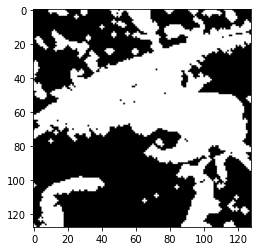

In [6]:
# Read image
img = cv2.imread("../imori.jpg").astype(np.float32)

gray = BGR2GRAY(img)
binary = otsu_binarization(gray)
out = opening(binary, 1) 

# Save result
#plt.figure(figsize=(10, 20))
plt.imshow(out, cmap='gray')

cv2.imwrite('out49.jpg', out)